# Explore here

In [65]:
import pandas as pd

In [66]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [67]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


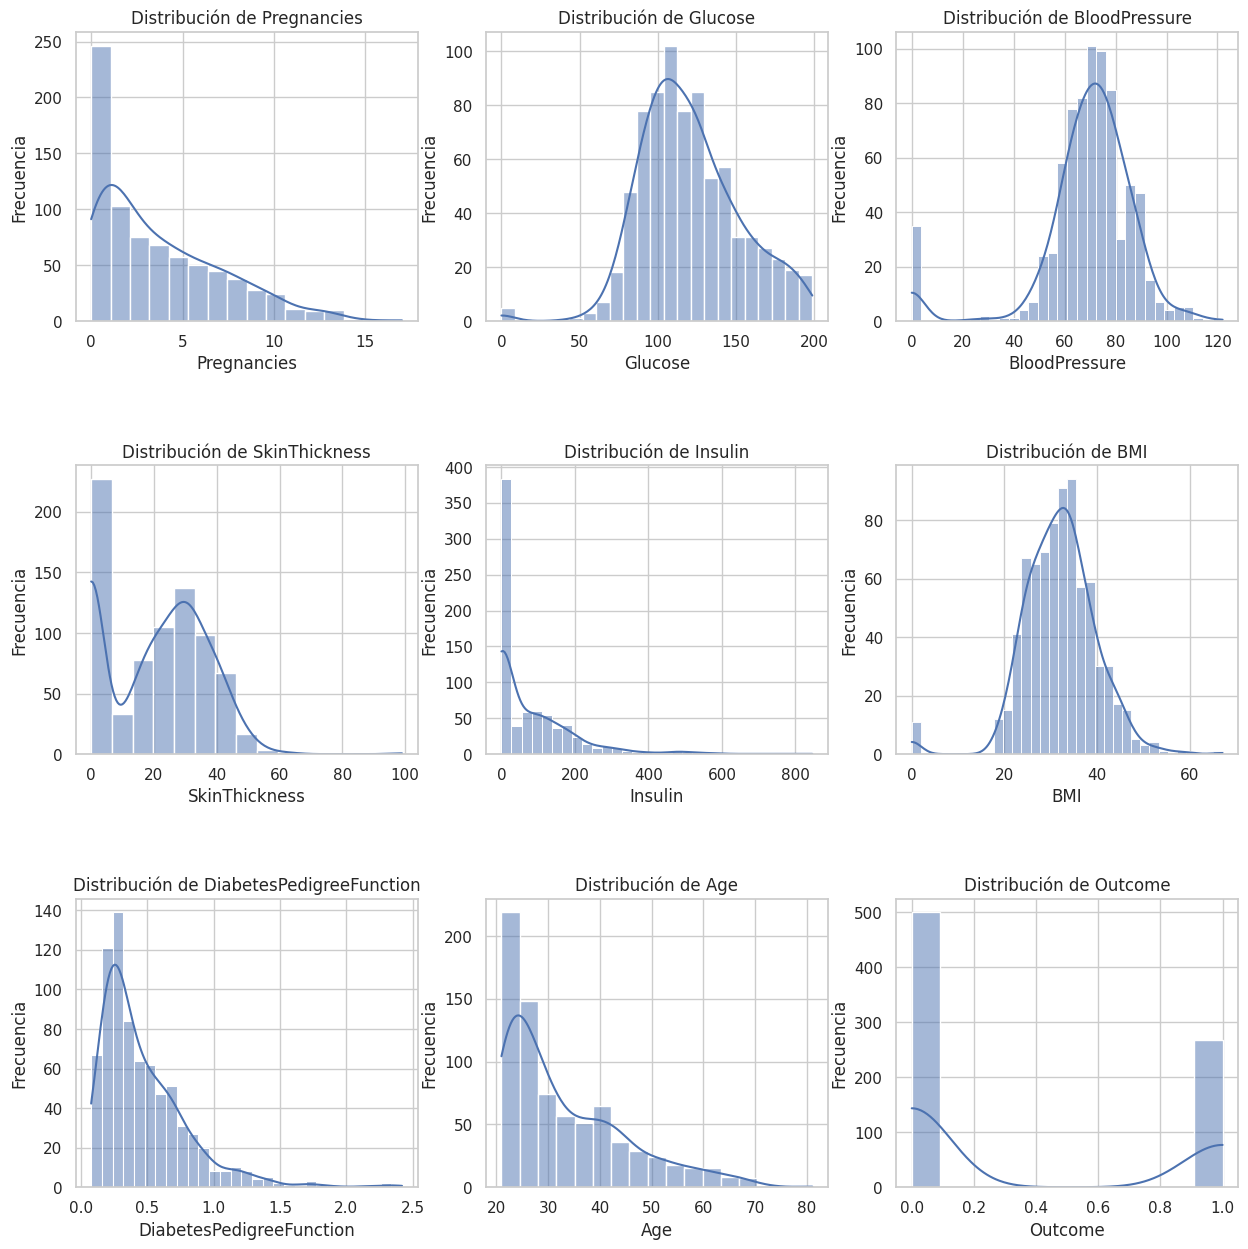

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

#Visualizacion
sns.set(style="whitegrid")
# Crea una figura con subgráficos para cada columna
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Lista de columnas
columns = df.columns

# Itera sobre las columnas y crea un gráfico de distribución para cada una
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.histplot(df[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frecuencia')

# Si hay menos columnas que subgráficos, oculta los ejes vacíos
for i in range(len(columns), 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.show()

Observación:
- Hay muchos ceros en SkinThickness y Insulin 

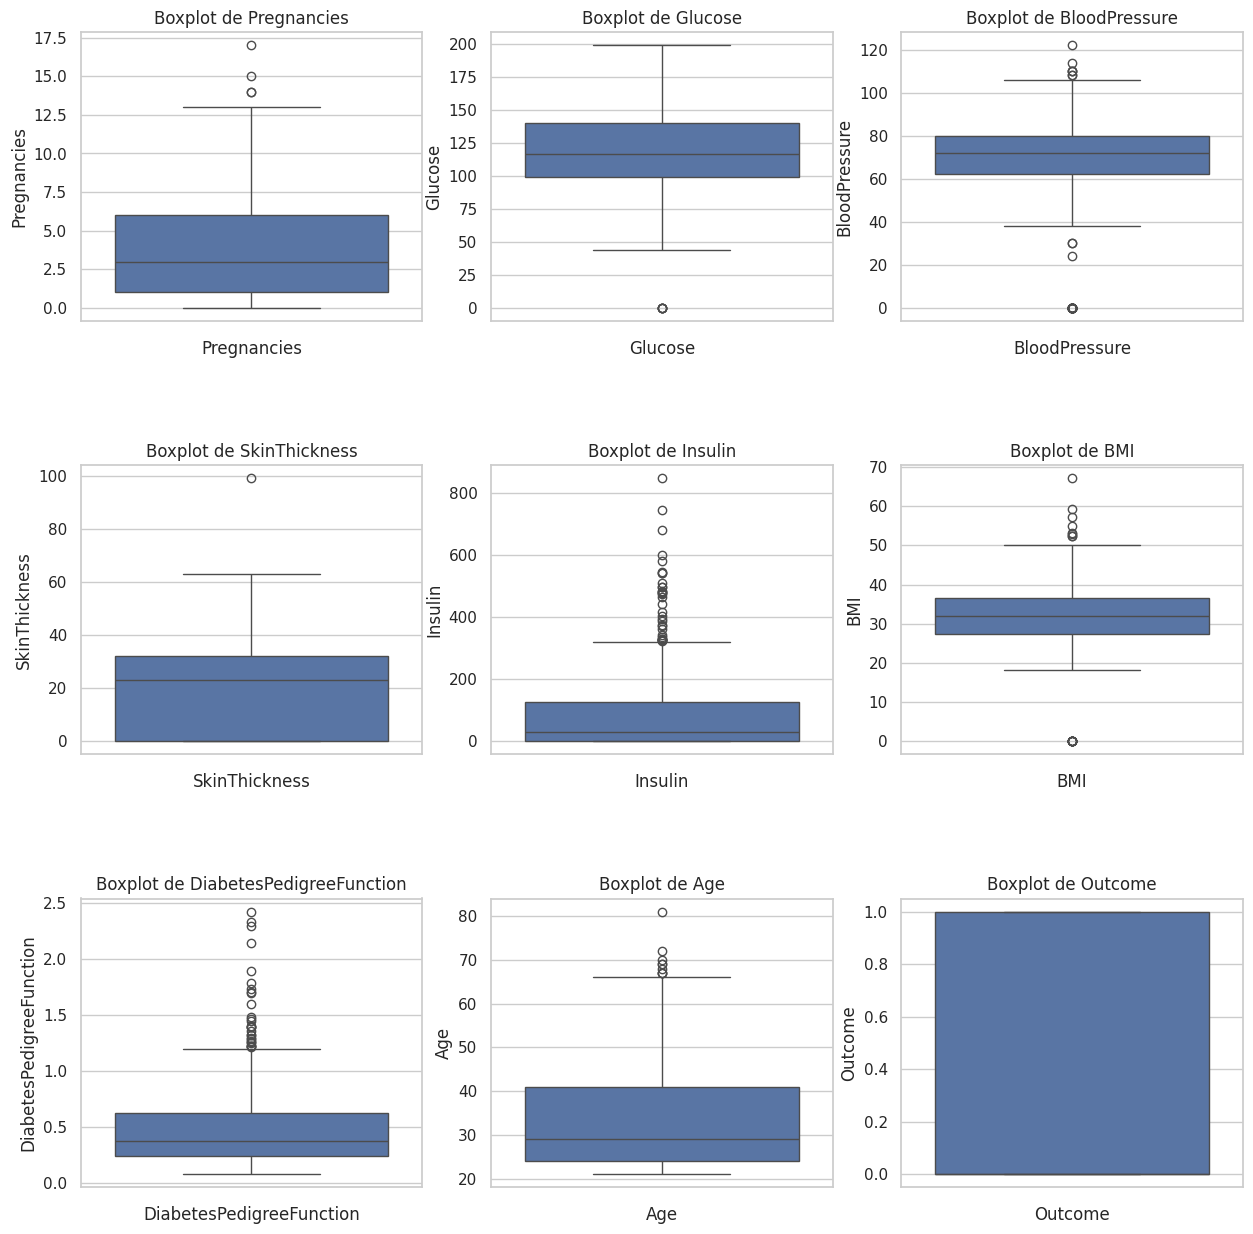

In [69]:
#Visualizacion Boxplot
#Estilo de los gráficos 
sns.set(style="whitegrid")

# Crea una figura con subgráficos para cada columna
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Lista de columnas
columns = df.columns

# Itera sobre las columnas y crea un boxplot para cada una
for i, column in enumerate(columns):
    row = i // 3
    col = i % 3
    sns.boxplot(y=df[column], ax=axes[row, col])  # Usamos 'y' para orientación vertical
    axes[row, col].set_title(f'Boxplot de {column}')
    axes[row, col].set_xlabel(column)
# Si hay menos columnas que subgráficos, oculta los ejes vacíos
for i in range(len(columns), 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])
plt.show()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Axes: >

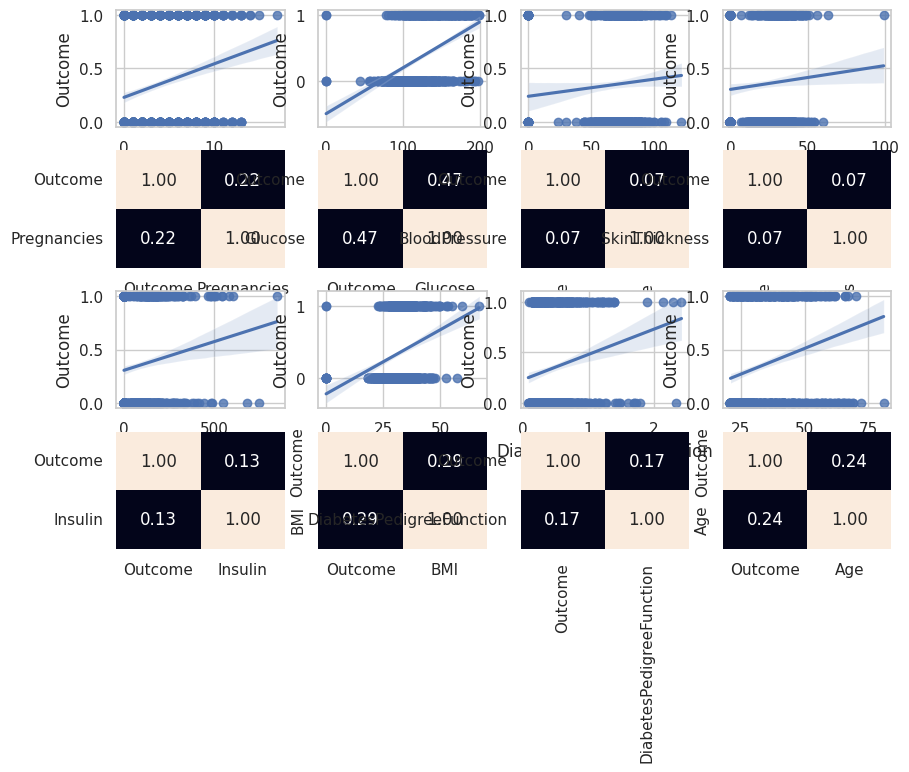

In [71]:
#Etiqueta = Diabetic
#Analisis Multivariable

fig, axis = plt.subplots(4, 4, figsize = (10, 7))

sns.regplot(ax = axis[0,0], data=df,x='Pregnancies', y='Outcome')
sns.heatmap(df[['Outcome','Pregnancies']].corr(),annot=True,fmt='.2f',ax=axis[1,0],cbar=False)

sns.regplot(ax = axis[0,1], data=df,x='Glucose', y='Outcome')
sns.heatmap(df[['Outcome','Glucose']].corr(),annot=True,fmt='.2f',ax=axis[1,1],cbar=False)

sns.regplot(ax = axis[0,2], data=df,x='BloodPressure', y='Outcome')
sns.heatmap(df[['Outcome','BloodPressure']].corr(),annot=True,fmt='.2f',ax=axis[1,2],cbar=False)

sns.regplot(ax = axis[0,3], data=df,x='SkinThickness', y='Outcome')
sns.heatmap(df[['Outcome','SkinThickness']].corr(),annot=True,fmt='.2f',ax=axis[1,3],cbar=False)

sns.regplot(ax = axis[2,0], data=df,x='Insulin', y='Outcome')
sns.heatmap(df[['Outcome','Insulin']].corr(),annot=True,fmt='.2f',ax=axis[3,0],cbar=False)

sns.regplot(ax = axis[2,1], data=df,x='BMI', y='Outcome')
sns.heatmap(df[['Outcome','BMI']].corr(),annot=True,fmt='.2f',ax=axis[3,1],cbar=False)

sns.regplot(ax = axis[2,2], data=df,x='DiabetesPedigreeFunction', y='Outcome')
sns.heatmap(df[['Outcome','DiabetesPedigreeFunction']].corr(),annot=True,fmt='.2f',ax=axis[3,2],cbar=False)

sns.regplot(ax = axis[2,3], data=df,x='Age', y='Outcome')
sns.heatmap(df[['Outcome','Age']].corr(),annot=True,fmt='.2f',ax=axis[3,3],cbar=False)


In [72]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [73]:
#AJUSTES DE ANOMALIAS OUTLIER

#Analisis Outlier Glucose
stats_Glucose = df['Glucose'].describe()
stats_Glucose
Glucose_iqr = stats_Glucose['75%']-stats_Glucose['25%']
limite_superior = stats_Glucose['75%'] + 1.5 * Glucose_iqr
limite_inferior = stats_Glucose['25%'] - 1.5 * Glucose_iqr

print(f'El limite superior e inferior para encontrar outliers es {round(limite_superior,2)} y {round(limite_inferior,2)}')

El limite superior e inferior para encontrar outliers es 202.12 y 37.12


In [74]:
#contar cuantos ceros hay en la columna Glucose
Glucose_zeros = df[df['Glucose'] == 0].shape[0]
Glucose_zeros #5 ceros en la columna Glucose.

#borrar los ceros
df = df[df['Glucose']>0]


In [75]:
#Analisis Outlier BloodPressure
stats_BloodPressure = df['BloodPressure'].describe()
stats_BloodPressure
BloodPressure_iqr = stats_BloodPressure['75%']-stats_BloodPressure['25%']
limite_superior = stats_BloodPressure['75%'] + 1.5 * BloodPressure_iqr
limite_inferior = stats_BloodPressure['25%'] - 1.5 * BloodPressure_iqr

print(f'El limite superior e inferior para encontrar outliers es {round(limite_superior,2)} y {round(limite_inferior,2)}')

El limite superior e inferior para encontrar outliers es 107.0 y 35.0


Observación:
- tomando en cuenta que el intercuartilico de la variable BloodPressure, se puede determinar que cualquier valor entre 35 y 107 es considerado outlier.
- El valor maximo de BloodPressure es de 122, aunque es alto es posible. Asi que se mantiene.

In [76]:
median_bp = df['BloodPressure'].median()
df['BloodPressure'] = df['BloodPressure'].apply(lambda x: median_bp if x < 35.0 else x)
stats_cleaned = df['BloodPressure'].describe()
print(stats_cleaned)

count    763.000000
mean      72.591088
std       11.770688
min       38.000000
25%       64.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 763 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               763 non-null    int64  
 1   Glucose                   763 non-null    int64  
 2   BloodPressure             763 non-null    float64
 3   SkinThickness             763 non-null    int64  
 4   Insulin                   763 non-null    int64  
 5   BMI                       763 non-null    float64
 6   DiabetesPedigreeFunction  763 non-null    float64
 7   Age                       763 non-null    int64  
 8   Outcome                   763 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 59.6 KB


In [78]:
#Analisis Outlier SkinThickness
stats_SkinThickness = df['SkinThickness'].describe()
stats_SkinThickness
SkinThickness_iqr = stats_SkinThickness['75%']-stats_SkinThickness['25%']
limite_superior = stats_SkinThickness['75%'] + 1.5 * SkinThickness_iqr
limite_inferior = stats_SkinThickness['25%'] - 1.5 * SkinThickness_iqr

print(f'El limite superior e inferior para encontrar outliers es {round(limite_superior,2)} y {round(limite_inferior,2)}')

El limite superior e inferior para encontrar outliers es 80.0 y -48.0


Observación:
- No se puede aplicar el intercuartilico para los valores cero, ya que el limite superior da negativo.
- Se reemplazará por la variable

In [79]:
#Tratamiento de ceros
SkinThickness_zeros = df[df['SkinThickness'] == 0].shape[0]
SkinThickness_zeros #227 ceros en la columna SkinThickness.

#reemplazo los ceros por la mediana
df['SkinThickness'] = df['SkinThickness'].replace(0, stats_SkinThickness['50%'])

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.591088,27.319790,80.292267,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,11.770688,9.232629,115.457448,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,38.000000,7.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [80]:
#Analisis Outlier Insulin
stats_Insulin = df['Insulin'].describe()
stats_Insulin
Insulin_iqr = stats_Insulin['75%']-stats_Insulin['25%']
limite_superior = stats_Insulin['75%'] + 1.5 * Insulin_iqr
limite_inferior = stats_Insulin['25%'] - 1.5 * Insulin_iqr

print(f'El limite superior e inferior para encontrar outliers es {round(limite_superior,2)} y {round(limite_inferior,2)}')

El limite superior e inferior para encontrar outliers es 321.25 y -192.75


In [81]:
#Tratamiento de ceros
Insulin_zeros = df[df['Insulin'] == 0].shape[0]
Insulin_zeros #370 ceros en la columna Insulin.

370

Observación
- La variable Insulin tiene 370 ceros, lo que representa el 48,7% de los datos.
- Se intentó no borrar la variable insulin, reemplazando por la mediana y tomandola como variable objetivo para predecir los valores faltantes.
- Para la optimizacion del modelo, eliminando el ruido. Se optó por eliminar la columna.

In [82]:
#reemplazo los ceros por la mediana
df['Insulin'] = df['Insulin'].replace(0, stats_Insulin['50%'])

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.591088,27.319790,97.749672,31.986763,0.472477,33.271298,0.348624
std,3.374729,30.535641,11.770688,9.232629,104.151258,7.893221,0.331963,11.772161,0.476847
min,0.000000,44.000000,38.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,36.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,128.500000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


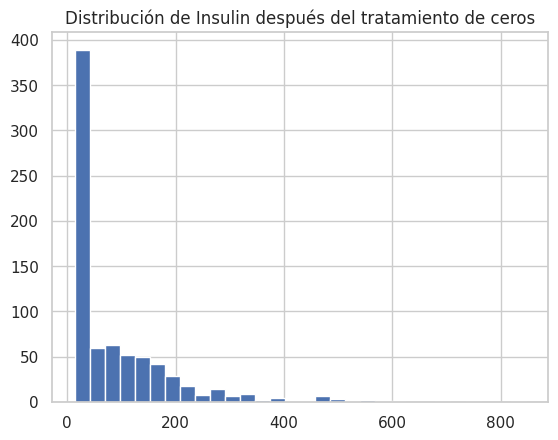

In [83]:
import matplotlib.pyplot as plt

plt.hist(df['Insulin'], bins=30)
plt.title('Distribución de Insulin después del tratamiento de ceros')
plt.show()

In [100]:
correlation = df['Insulin'].corr(df['Outcome'])
print(f'Correlación entre Insulin y Outcome: {correlation}')

Correlación entre Insulin y Outcome: 0.15285287807438908


In [101]:
df = df.drop(columns=['Insulin'])

In [102]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.591088,27.319790,32.448100,0.472477,33.271298,0.348624
std,3.374729,30.535641,11.770688,9.232629,6.878946,0.331963,11.772161,0.476847
min,0.000000,44.000000,38.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


In [103]:
#Analisis Outlier BMI
stats_BMI = df['BMI'].describe()
stats_BMI
BMI_iqr = stats_BMI['75%']-stats_BMI['25%']
limite_superior = stats_BMI['75%'] + 1.5 * BMI_iqr
limite_inferior = stats_BMI['25%'] - 1.5 * BMI_iqr

print(f'El limite superior e inferior para encontrar outliers es {round(limite_superior,2)} y {round(limite_inferior,2)}')

El limite superior e inferior para encontrar outliers es 50.12 y 13.93


In [104]:
#Tratamiento de ceros
BMI_zeros = df[df['BMI'] == 0].shape[0]
BMI_zeros #11 ceros en la columna BMI.

#cambio por la mediana
df['BMI'] = df['BMI'].replace(0, stats_BMI['50%'])

df.describe()



,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
count,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000,763.000000
mean,3.851900,121.686763,72.591088,27.319790,32.448100,0.472477,33.271298,0.348624
std,3.374729,30.535641,11.770688,9.232629,6.878946,0.331963,11.772161,0.476847
min,0.000000,44.000000,38.000000,7.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,23.000000,27.500000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,36.550000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,67.100000,2.420000,81.000000,1.000000


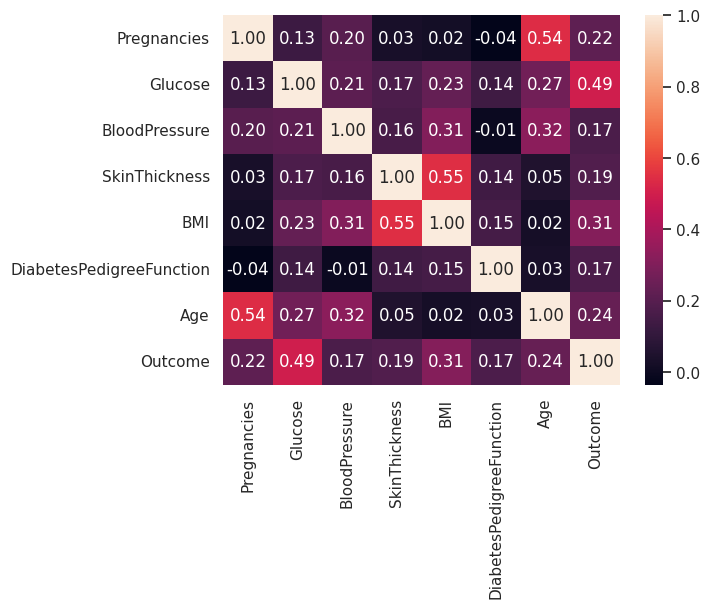

In [122]:
#heatmap
columnas_correlacion = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age','Outcome']
sns.heatmap(df[columnas_correlacion].corr(),annot=True,fmt='.2f')
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Pregnancies'),
  Text(1, 0, 'Glucose'),
  Text(2, 0, 'BloodPressure'),
  Text(3, 0, 'SkinThickness'),
  Text(4, 0, 'BMI'),
  Text(5, 0, 'DiabetesPedigreeFunction'),
  Text(6, 0, 'Age')])

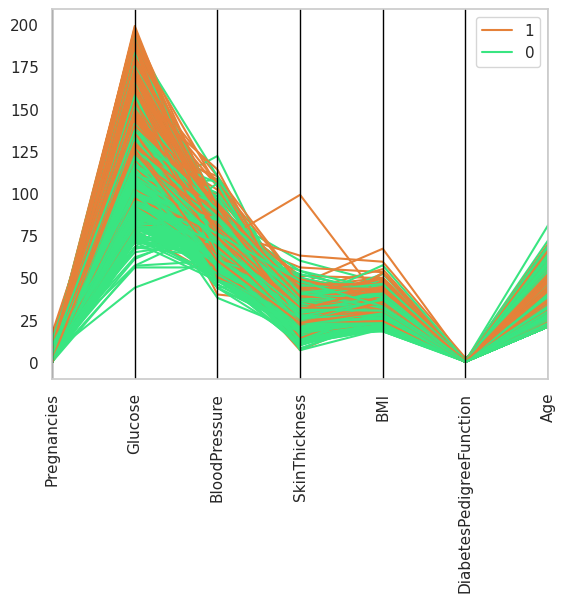

In [121]:
df = X
df["Outcome"] = y

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))
plt.xticks(rotation=90)

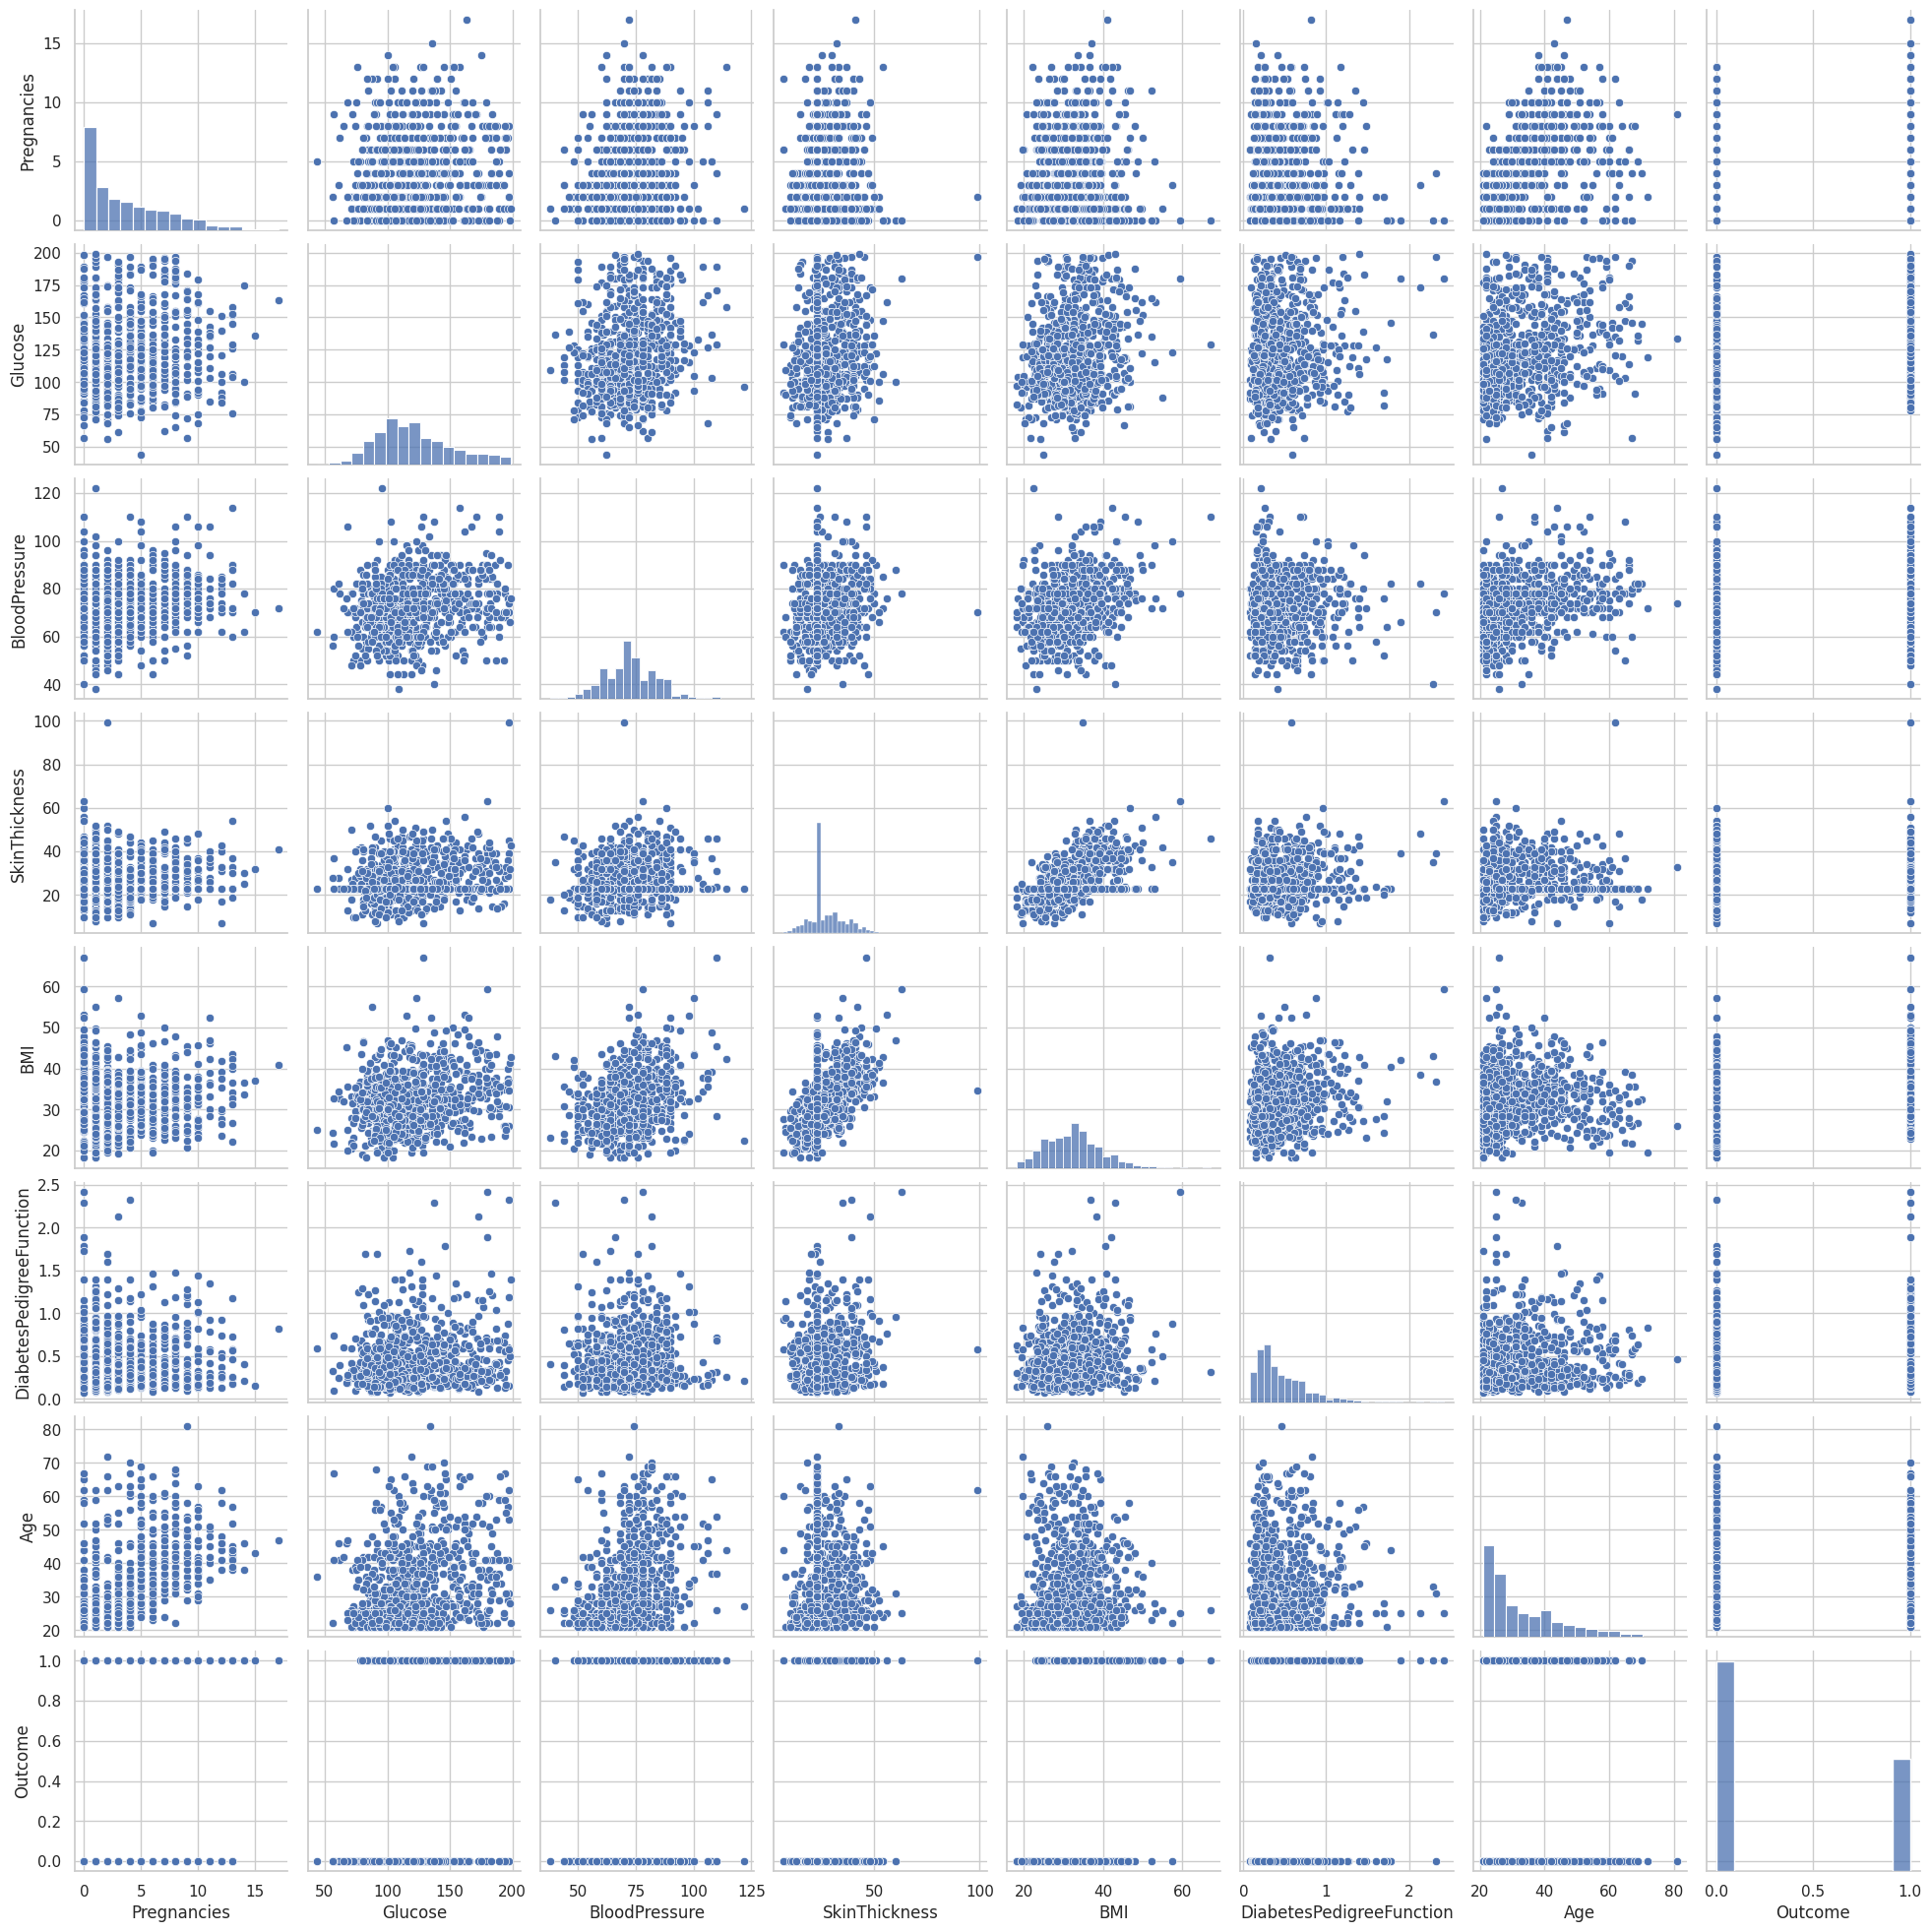

In [123]:
sns.pairplot(data=df)
plt.show()

In [105]:
from sklearn.model_selection import train_test_split
X = df.drop('Outcome',axis=1)
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
338,9,152,78.0,34,34.2,0.893,33
728,2,175,88.0,23,22.9,0.326,22
292,2,128,78.0,37,43.3,1.224,31
690,8,107,80.0,23,24.6,0.856,34
91,4,123,80.0,15,32.0,0.443,34


In [106]:
from sklearn.tree import DecisionTreeClassifier

model =DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

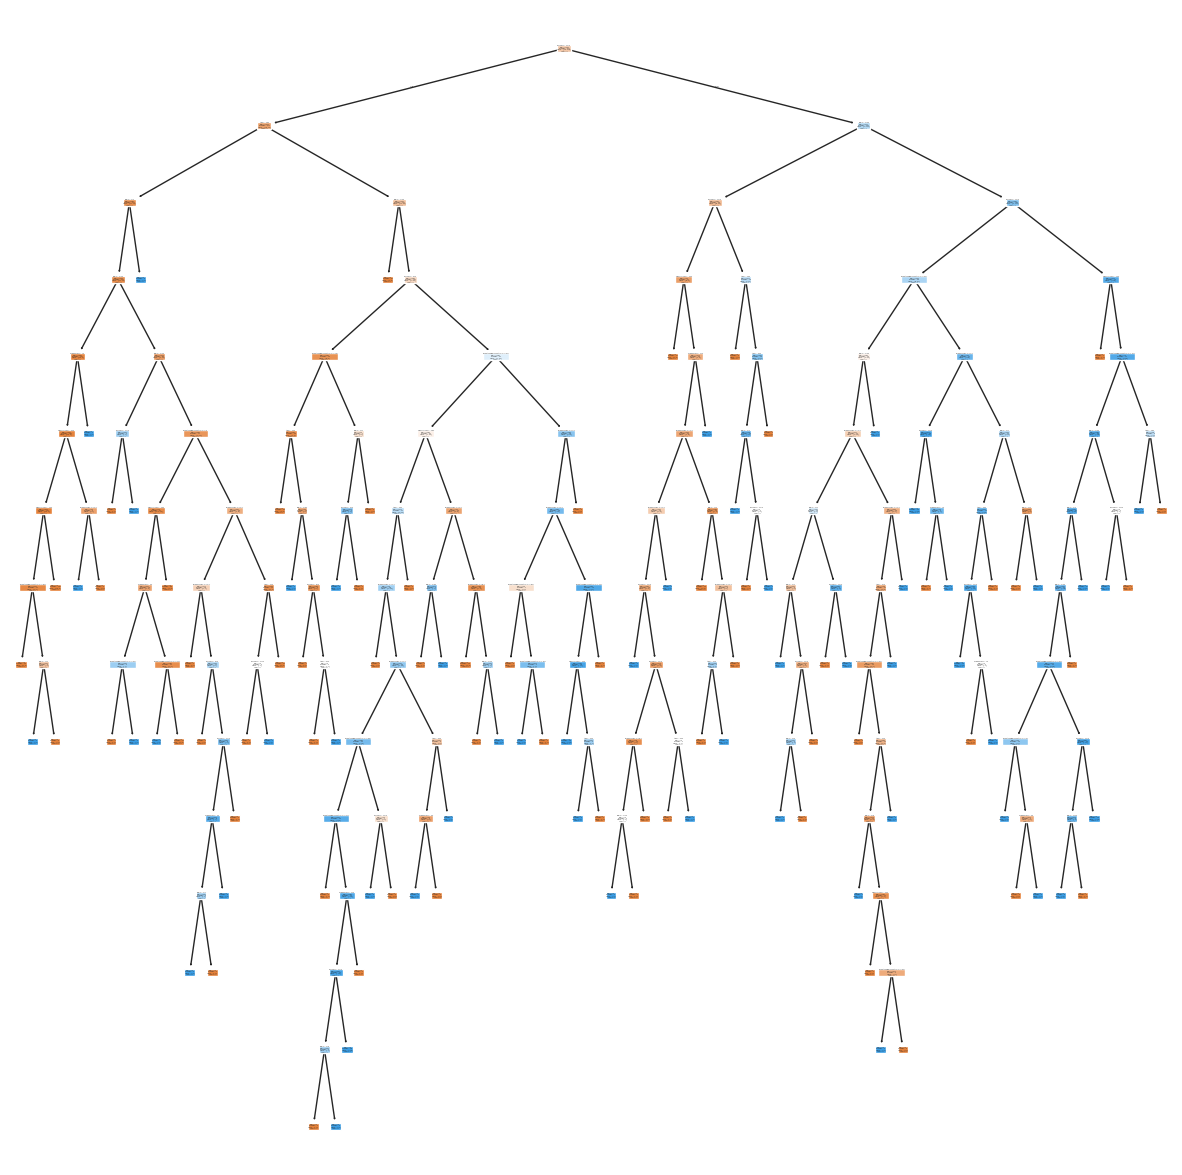

In [107]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()


In [108]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [109]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.738562091503268

In [110]:
model1 = DecisionTreeClassifier(random_state=42,criterion='entropy')
model2 = DecisionTreeClassifier(random_state=42,criterion='log_loss')

model1.fit(X_train,y_train)
model2.fit(X_train,y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

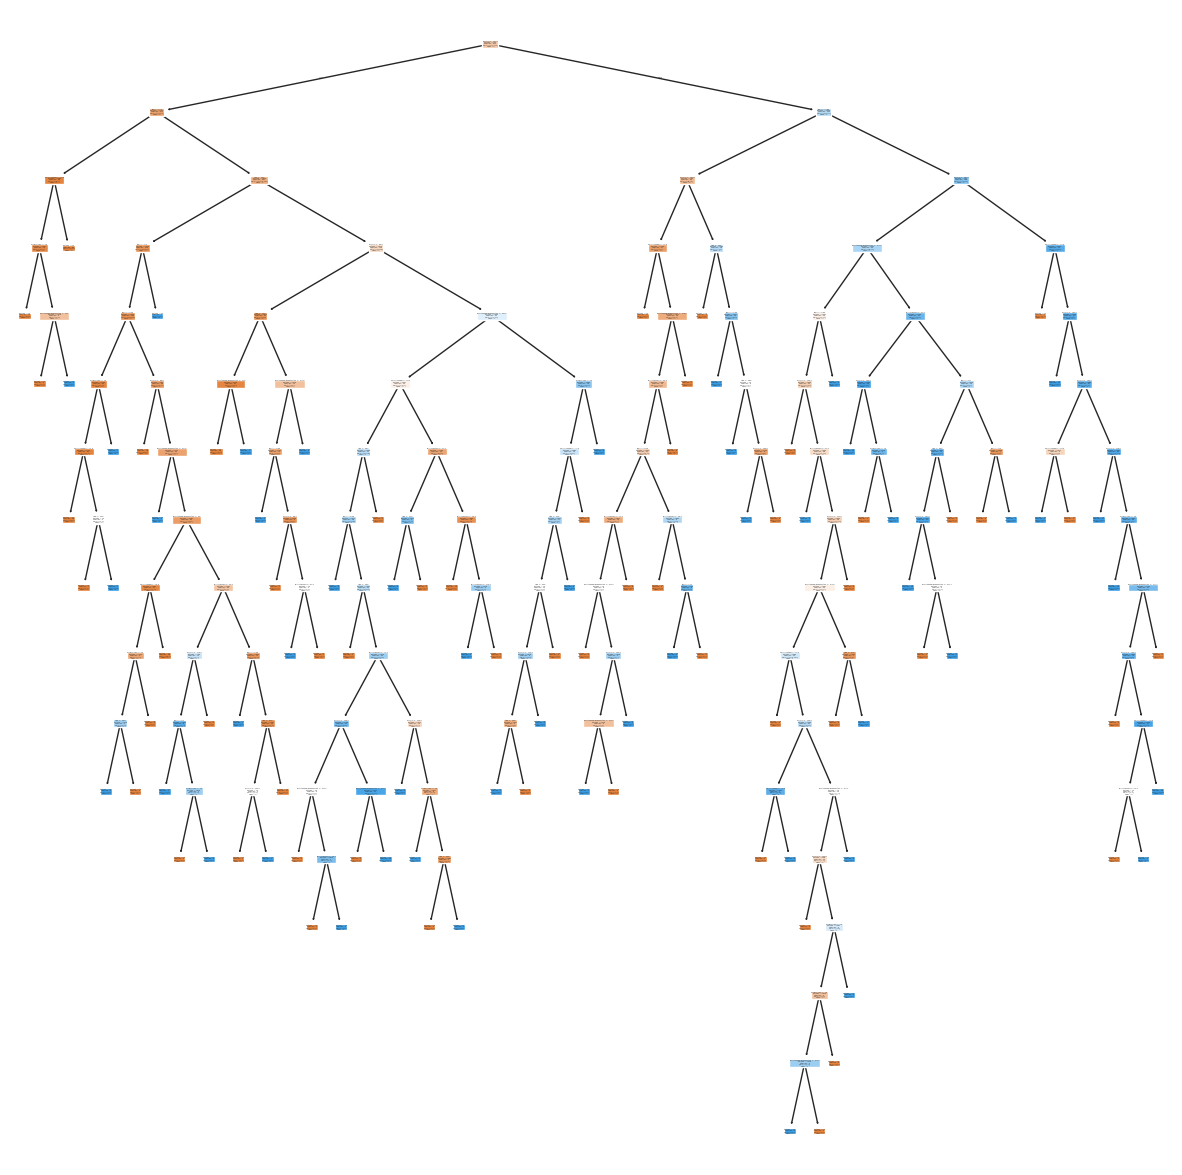

In [111]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model1, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()


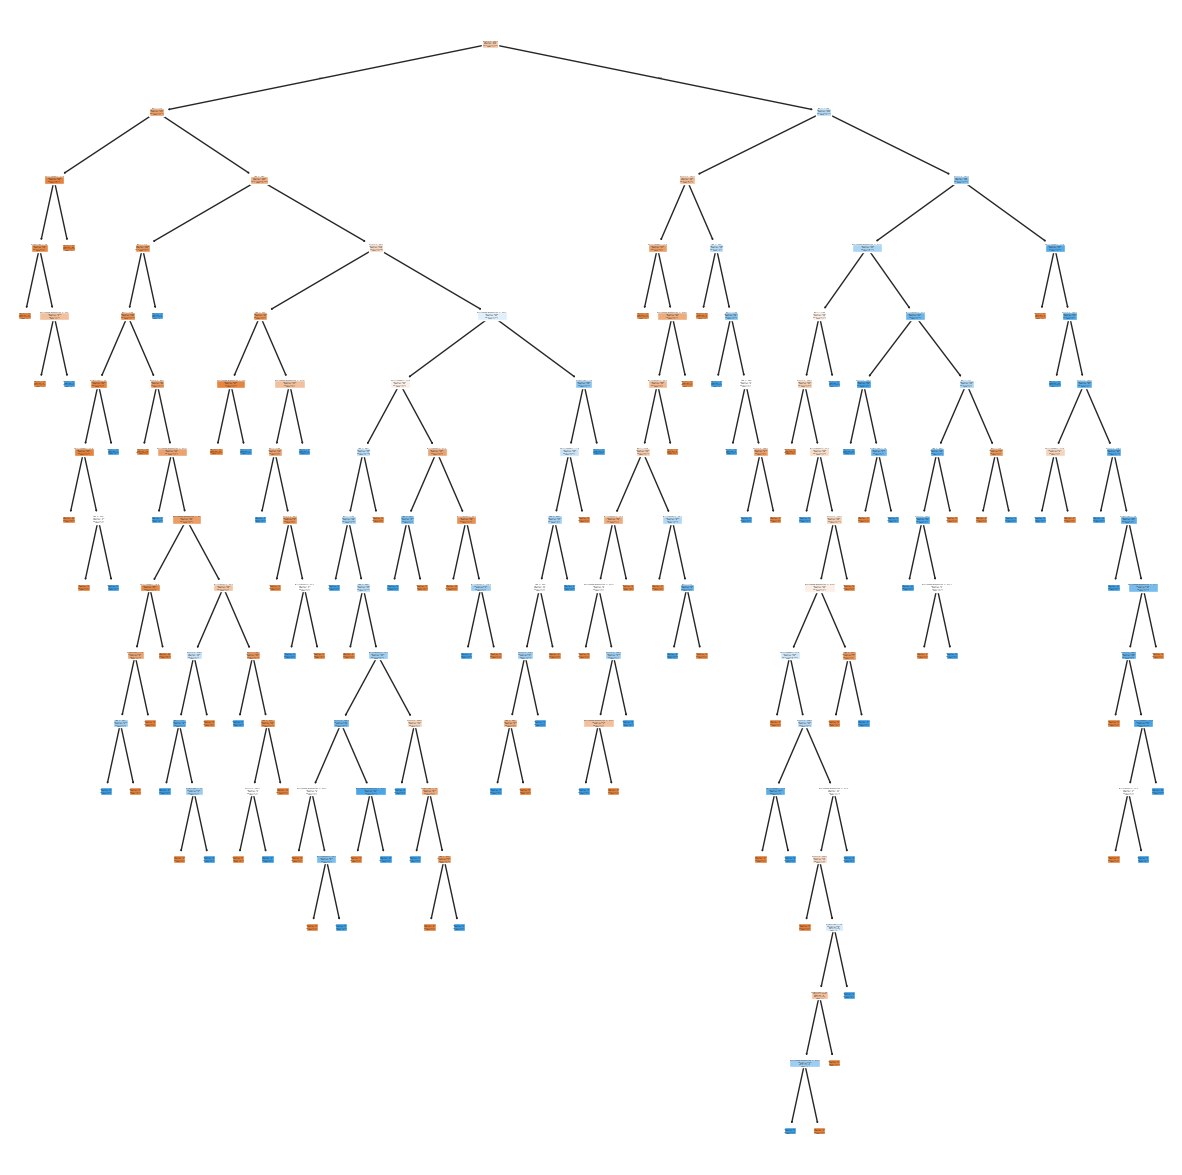

In [112]:

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model2, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()


In [113]:
y_pred_entropy = model1.predict(X_test)
print(accuracy_score(y_test,y_pred_entropy))
y_pred_log_loss = model2.predict(X_test)
print(accuracy_score(y_test,y_pred_log_loss))

0.803921568627451
0.803921568627451


Observación:
- Aplicando Entropía y Log Loss se obtuvo un mejor modelo : 80,4%

In [115]:
DecisionTreeClassifier()
grid = {
    'criterion' : ['gini','log_loss','entropy'],
    'min_samples_split' : [2,4,6,8],
    'min_samples_leaf' : [1,2,4,6,8],
    'max_features' : ['auto','sqrt','log2',2,3,4,5]
}

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model,grid,scoring='accuracy')
clf.fit(X_train,y_train)

best_model = clf.best_estimator_

print(clf.best_params_)
print(clf.best_score_)

{'criterion': 'log_loss', 'max_features': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}
0.7770491803278687


/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
300 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/vscode/.local/lib/python3.10/site-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/home/vscode/.l

In [116]:
model.feature_importances_

array([0.0445777 , 0.33119683, 0.11520749, 0.03345433, 0.24927974,
       0.10837549, 0.11790842])

In [117]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [118]:
from pickle import dump

dump(best_model, open('../models/decision_tree_classifier_metrics_42.sav', 'wb'))